# DAO2NFT: increase DAO Health using reputation NFTs

## Research Topic/Question
- a. How can we make DAOs well functioning organisations?
    - i. Increasing DAO member (stakeholder) engagement
    - ii. Identify reward systems for different stakeholders
    - iii. Balance parameter settings in Grant logistics
- b. Can we derive assumptions of what might increase DAO's health?
    - i. Under what conditions will stakeholder participation grow?
    - ii. Under what conditions is grant funding well spent?

## Test agents

Stakeholders of DAOs are:
- Investors (Stakers)
- DAO Protocol initiators (Ambassadors)
- DAO Consumers
- DAO Producers
- DAO Intermediairies (Market Makers)
- Producer Aggregators (Unions)
- Proposal Applicants (Grantees)

## Policies and mechanisms (Ocean DAO)
- Investors
    - Stake on high performance datasets
    - Want to know what datasets are (going to be) valuable
    - Provide liquidity for an ROI
    - Unstake on poor performing datasets

- Ambassadors
    - Want to grow the ecosystem
    - Help newcomers onboard
    - Perform parameter adjustments for funding projects
    - Guide grantees in project proposals

- Consumers
    - Want good datasets for a fair price
    - Look for bargains
    - Want to be guided to curated datasets

- Producers
    - Want a fair price for their data
    - Will bargain for liquidity
    - Want to know what the market is looking for

- Market Makers
    - Want to promote datasets for market needs
    - Incentivise producers to provide by delivering needs
    - Incentivise consumers to buy by delivring curated lists of datasets

- Unions
    - Aggregate individual datasets in order to have more chance of being recognized as valuable
    - Make use of Market Makers curated lists

- Grantees ()
    - Want to earn rewards for growing the ecosystem
    - Want to know the best way for success using the rules of the DAO (Game theory)
   

### Assumptions



## Model File Structure


In [1]:
!pip install radcad
!pip install matplotlib
!pip install enforce_typing
!pip install names

## Run Model



In [1]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import enforce_typing

# Experiments
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

#df = run.run()
#rdf = run.postprocessing(df)
# rdf = df # debugging substeps


In [2]:
from model.state_variables_model1 import genesis_state
from model.partial_state_update_block_model1 import partial_state_update_block
from model.sim_setup import SIMULATION_TIME_STEPS, MONTE_CARLO_RUNS
from model.sys_params_model1 import params

running file: sim_setup.py
SIMULATION_TIME_STEPS:  360
MONTE_CARLO_RUNS:  4
end of file: sim_setup.py


In [3]:
model = Model(initial_state=genesis_state, state_update_blocks=partial_state_update_block, params=params)

simulation = Simulation(model=model, timesteps=SIMULATION_TIME_STEPS, runs=MONTE_CARLO_RUNS)

simulations = [simulation]
experiment = Experiment(simulations)
# Select the Pathos backend to avoid issues with multiprocessing and Jupyter Notebooks
experiment.engine = Engine(backend=Backend.PATHOS, drop_substeps=True)

result = experiment.run()

## Interpretation of Results

In [4]:
df = pd.DataFrame(result)
# rdf = df[df['substep'] == df.substep.max()]
df.head(40)

,dao_members,voters,grant_cap,projects,yes_votes,no_votes,valuable_projects,unsound_projects,simulation,subset,run,substep,timestep
0,100,50,200,0,30,10,0,0,0,0,1,0,0
1,100,50,200,1,30,10,1,1,0,0,1,2,1
2,100,50,200,1,30,10,0,0,0,0,1,2,2
3,100,50,200,2,30,10,1,1,0,0,1,2,3
4,100,50,200,3,30,10,0,0,0,0,1,2,4
5,100,50,200,4,30,10,1,1,0,0,1,2,5
6,100,50,200,5,30,10,2,2,0,0,1,2,6
7,100,50,200,5,30,10,1,1,0,0,1,2,7
8,100,50,200,6,30,10,2,2,0,0,1,2,8
9,100,50,200,6,25,11,1,3,0,0,1,2,9


Text(0.5, 1.0, 'Votes')

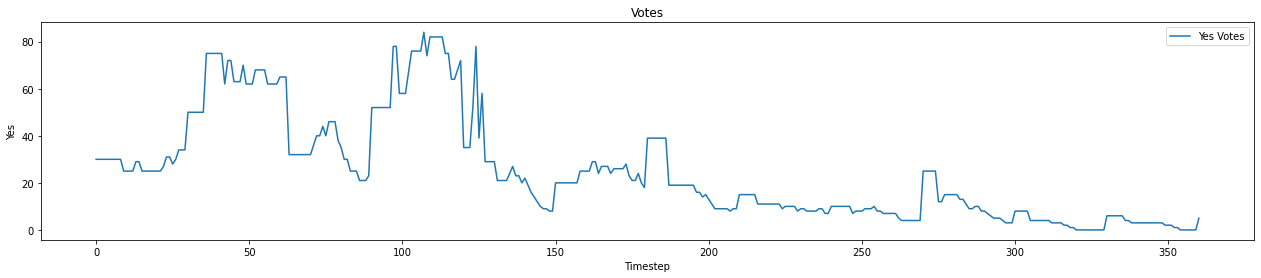

In [5]:
import matplotlib.pyplot as plt

df1 = df[(df['run'] == 1)]
plt.figure(figsize=(100,4))
plt.subplot(141)
plt.plot(df1['timestep'], df1["yes_votes"],label='Yes Votes')
plt.xlabel('Timestep')
plt.ylabel('Yes')
plt.legend()
plt.title('Votes')

In [6]:
df1 = df[(df['run'] == 1) & (df['simulation'] == 0)]
df2 = df[(df['run'] == 2) & (df['simulation'] == 0)]
df3 = df[(df['run'] == 3) & (df['simulation'] == 0)]
df4 = df[(df['run'] == 4) & (df['simulation'] == 0)]

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)
df4.reset_index(drop=True, inplace=True)

dfs1 = [df1,df2,df3,df4]
df4.head()

,dao_members,voters,grant_cap,projects,yes_votes,no_votes,valuable_projects,unsound_projects,simulation,subset,run,substep,timestep
0,100,50,200,0,30,10,0,0,0,0,4,0,0
1,100,50,200,1,30,10,1,1,0,0,4,2,1
2,100,50,200,2,30,10,0,0,0,0,4,2,2
3,100,50,200,3,30,10,1,1,0,0,4,2,3
4,100,50,200,4,30,10,0,0,0,0,4,2,4


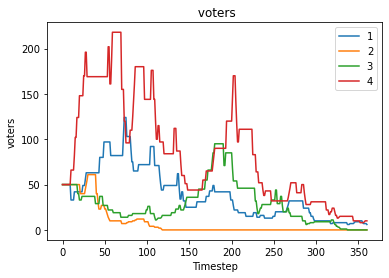

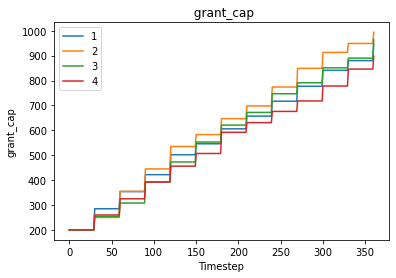

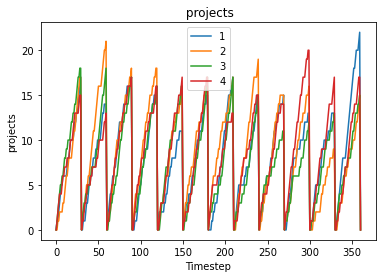

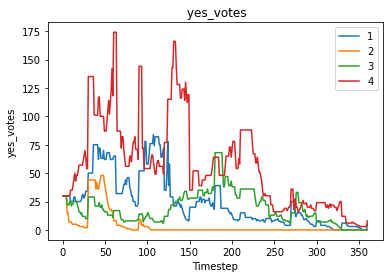

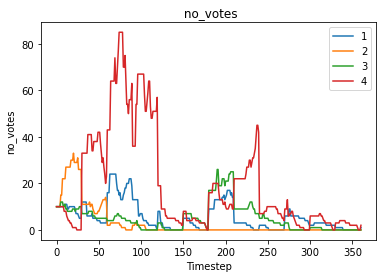

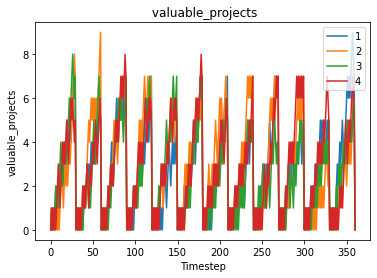

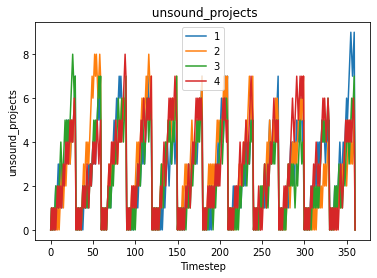

In [8]:
from model.plot_utils import monte_carlo_plot

monte_carlo_plot(dfs1, 'voters')
monte_carlo_plot(dfs1, 'grant_cap')
monte_carlo_plot(dfs1, 'projects')
monte_carlo_plot(dfs1, 'yes_votes')
monte_carlo_plot(dfs1, 'no_votes')
monte_carlo_plot(dfs1, 'valuable_projects')
monte_carlo_plot(dfs1, 'unsound_projects')
